Notebook to show the performance of N2N4M denoising unseen real images. An image pair is used as an example - FRT00009A16 and ATU0003561F. The FRT image was acquired in 2008 and is low-noise. THe ATU image was acquired over the same area in 2015 and is very noisy. We denoise the ATU image and compare the mineralogical information with the FRT image.

If you wish to rerun this experiment, you must download those two images from MarsSI, and use the _CAT_corr.img files.

In [31]:
import matplotlib.pyplot as plt
import os

from n2n4m.crism_image import CRISMImage, CRISMImageCotcat, CRISMImageN2N4M
from n2n4m.plot import Visualiser, DenoisedVisualiser

In [32]:
PACKAGE_DIR = os.path.dirname(os.path.dirname(os.getcwd()))
DATA_DIR = os.path.join(PACKAGE_DIR, "data")
CRISM_ML_DATA_DIR = os.path.join(DATA_DIR, "CRISM_ML")
FRT_IMAGE_PATH = # Insert the path to the FRT.img file here
ATU_IMAGE_PATH = # Insert the path to the ATU.img file here

'/raid/home/rp1818/N2N4M/N2N4M'

FRT00009A16

In [4]:
old_image = CRISMImage(FRT_IMAGE_PATH)  # Load the image

Image loaded successfully.


In [5]:
old_image.ratio_image(CRISM_ML_DATA_DIR)

/raid/home/rp1818/N2N4M/N2N4M/n2n4m/preprocessing.py:243: RuntimeWarning: Mean of empty slice
  image_copy = np.nan_to_num(image_copy, nan=np.nanmean(image_copy, axis=0))
/home/rp1818/miniconda3/envs/CRISM_env_3/lib/python3.11/site-packages/crism_ml/preprocessing.py:410: RuntimeWarning: invalid value encountered in divide
  normed = pixspec[idx, :, :] / bland


In [6]:
# Known deposit of hydrated Fe/Mg clays in the image.
old_image.calculate_summary_parameter("hyd_femg_clay_index")

/raid/home/rp1818/N2N4M/N2N4M/n2n4m/summary_parameters.py:139: RuntimeWarning: invalid value encountered in divide
  band_depth = center_ref / interpolated_center_ref


(<Figure size 640x480 with 1 Axes>, <Axes: title={'center': 'FRT00009A16'}>)

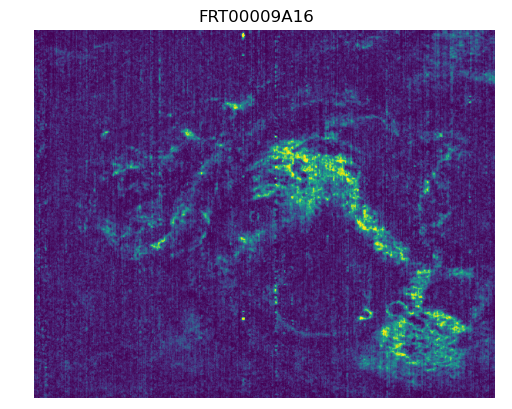

In [7]:
old_image_vis = Visualiser(old_image)
old_image_vis.plot_image(old_image_vis.get_summary_parameter("hyd_femg_clay_index"))

ATU0003561F

In [8]:
new_image = CRISMImage(ATU_IMAGE_PATH)
new_image.ratio_image(CRISM_ML_DATA_DIR)
new_image.calculate_summary_parameter("hyd_femg_clay_index")

Image loaded successfully.


/raid/home/rp1818/N2N4M/N2N4M/n2n4m/preprocessing.py:243: RuntimeWarning: Mean of empty slice
  image_copy = np.nan_to_num(image_copy, nan=np.nanmean(image_copy, axis=0))
/home/rp1818/miniconda3/envs/CRISM_env_3/lib/python3.11/site-packages/crism_ml/preprocessing.py:410: RuntimeWarning: invalid value encountered in divide
  normed = pixspec[idx, :, :] / bland
/raid/home/rp1818/N2N4M/N2N4M/n2n4m/summary_parameters.py:139: RuntimeWarning: invalid value encountered in divide
  band_depth = center_ref / interpolated_center_ref


(<Figure size 640x480 with 1 Axes>, <Axes: title={'center': 'ATU0003561F'}>)

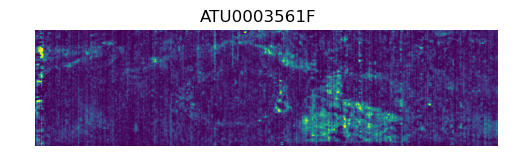

In [9]:
new_image_vis = Visualiser(new_image)
new_image_vis.plot_image(new_image_vis.get_summary_parameter("hyd_femg_clay_index"))

CoTCAT Denoising

In [10]:
new_image_cotcat = CRISMImageCotcat(ATU_IMAGE_PATH)
new_image_cotcat.cotcat_denoise()
new_image_cotcat.ratio_denoised_image(CRISM_ML_DATA_DIR)
new_image_cotcat.calculate_summary_parameter("hyd_femg_clay_index")

Image loaded successfully.


/raid/home/rp1818/N2N4M/N2N4M/n2n4m/preprocessing.py:243: RuntimeWarning: Mean of empty slice
  image_copy = np.nan_to_num(image_copy, nan=np.nanmean(image_copy, axis=0))
/home/rp1818/miniconda3/envs/CRISM_env_3/lib/python3.11/site-packages/crism_ml/preprocessing.py:410: RuntimeWarning: invalid value encountered in divide
  normed = pixspec[idx, :, :] / bland


(<Figure size 640x480 with 1 Axes>, <Axes: title={'center': 'ATU0003561F'}>)

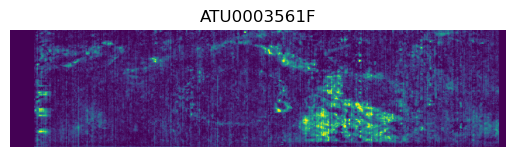

In [11]:
new_image_cotcat_vis = DenoisedVisualiser(new_image_cotcat)
new_image_cotcat_vis.plot_image(
    new_image_cotcat_vis.get_summary_parameter("hyd_femg_clay_index")
)

N2N4M Denoising

In [12]:
new_image_n2n4m = CRISMImageN2N4M(ATU_IMAGE_PATH)
new_image_n2n4m.load_n2n4m_model()
new_image_n2n4m.load_n2n4m_scaler()
new_image_n2n4m.n2n4m_denoise()
new_image_n2n4m.ratio_denoised_image(CRISM_ML_DATA_DIR)
new_image_n2n4m.calculate_summary_parameter("hyd_femg_clay_index")

Image loaded successfully.


/home/rp1818/miniconda3/envs/CRISM_env_3/lib/python3.11/site-packages/torch/cuda/__init__.py:107: UserWarning: CUDA initialization: CUDA unknown error - this may be due to an incorrectly set up environment, e.g. changing env variable CUDA_VISIBLE_DEVICES after program start. Setting the available devices to be zero. (Triggered internally at /opt/conda/conda-bld/pytorch_1682343995622/work/c10/cuda/CUDAFunctions.cpp:109.)
  return torch._C._cuda_getDeviceCount() > 0
/home/rp1818/miniconda3/envs/CRISM_env_3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RobustScaler was fitted with feature names
  warnings.warn(
/raid/home/rp1818/N2N4M/N2N4M/n2n4m/preprocessing.py:243: RuntimeWarning: Mean of empty slice
  image_copy = np.nan_to_num(image_copy, nan=np.nanmean(image_copy, axis=0))
/home/rp1818/miniconda3/envs/CRISM_env_3/lib/python3.11/site-packages/crism_ml/preprocessing.py:410: RuntimeWarning: invalid value encountered in divide
  

(<Figure size 640x480 with 1 Axes>, <Axes: title={'center': 'ATU0003561F'}>)

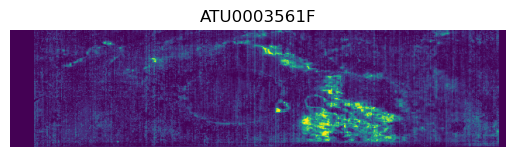

In [13]:
new_image_n2n4m_vis = DenoisedVisualiser(new_image_n2n4m)
new_image_n2n4m_vis.plot_image(
    new_image_n2n4m_vis.get_summary_parameter("hyd_femg_clay_index")
)

Plot all together for comparison

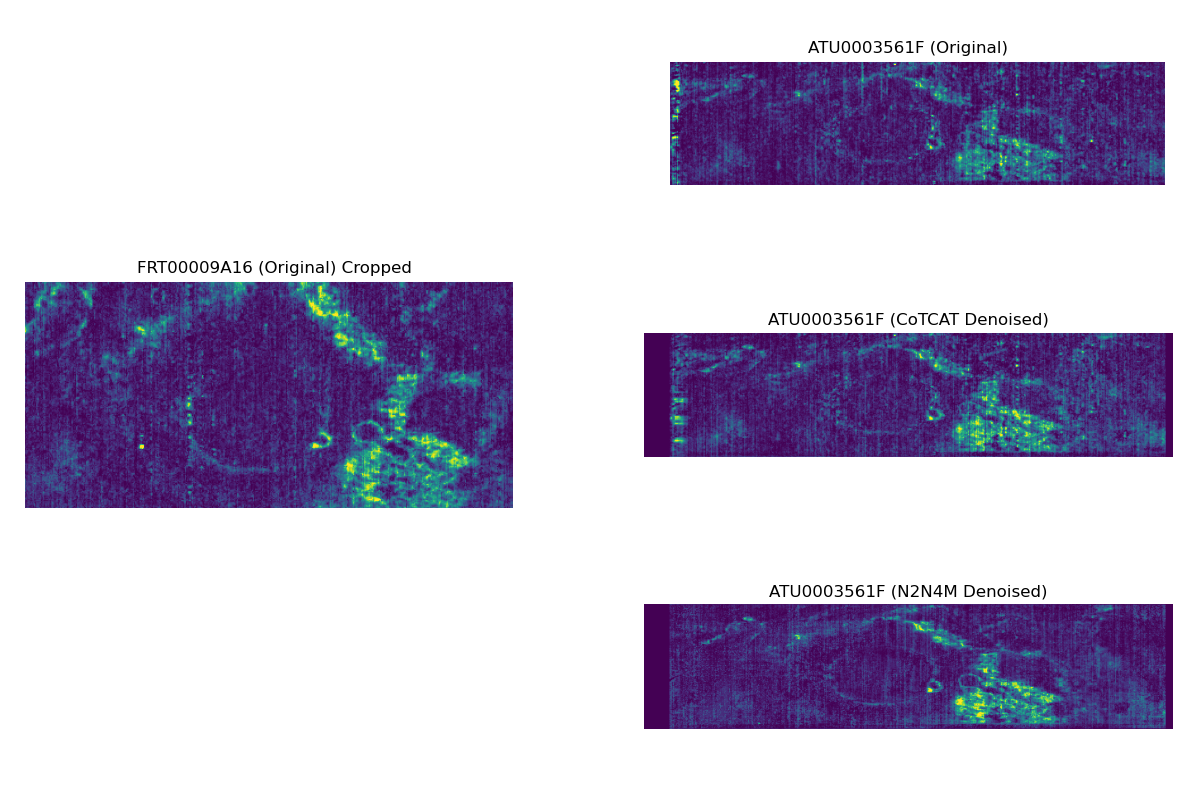

In [30]:
fig, ax = plt.subplots(3, 2, figsize=(15, 10))
old_image_vis.plot_image(
    old_image_vis.get_summary_parameter("hyd_femg_clay_index")[230:430, 200:],
    ax=ax[1, 0],
    title="FRT00009A16 (Original) Cropped",
)  # Cropped to ~similar area as the ATU image
new_image_vis.plot_image(
    new_image_vis.get_summary_parameter("hyd_femg_clay_index"),
    ax=ax[0, 1],
    title="ATU0003561F (Original)",
)
new_image_cotcat_vis.plot_image(
    new_image_cotcat_vis.get_summary_parameter("hyd_femg_clay_index"),
    ax=ax[1, 1],
    title="ATU0003561F (CoTCAT Denoised)",
)
new_image_n2n4m_vis.plot_image(
    new_image_n2n4m_vis.get_summary_parameter("hyd_femg_clay_index"),
    ax=ax[2, 1],
    title="ATU0003561F (N2N4M Denoised)",
)
for a in ax.flatten():
    a.axis("off")